In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn

# import some data 

In [4]:
from sklearn.datasets import load_iris
data = pd.DataFrame(data = load_iris()['data'] , columns = load_iris()['feature_names'] )

In [5]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
data.info() # so we have 150 entries and all are flaoting types (only interger values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
data.describe() # no missing values (range is okay and data is distributed normally)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='sepal length (cm)'>

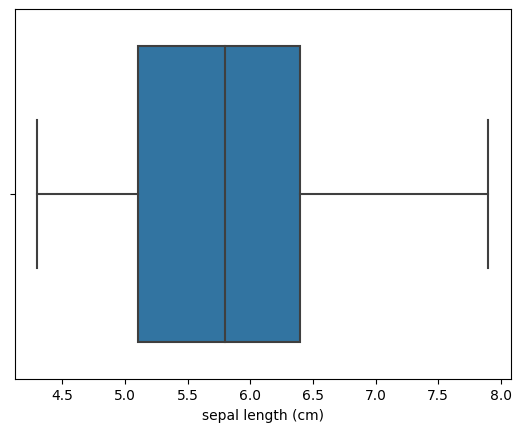

In [8]:
# to get more overview (try ploting boxplot)

sns.boxplot(x = data[data.columns[0]])

<Axes: xlabel='sepal width (cm)'>

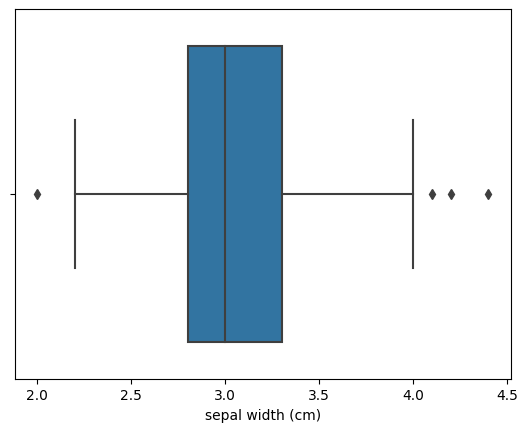

In [9]:

sns.boxplot(x = data[data.columns[1]])

<Axes: xlabel='petal length (cm)'>

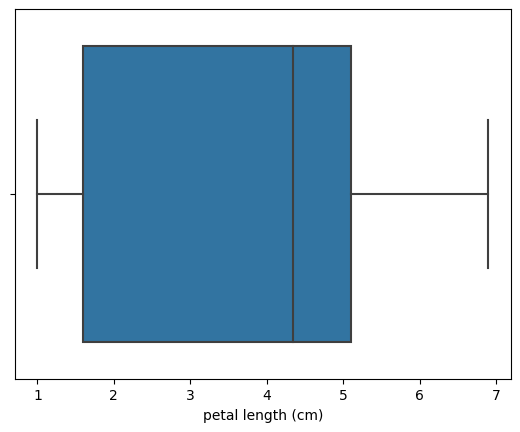

In [10]:

sns.boxplot(x = data[data.columns[2]])

In [11]:
X = data 
y = load_iris()['target']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,  y , test_size = 0.3 , random_state = 42)  

In [13]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()

In [14]:
linear.fit(X_train,y_train)

LinearRegression()

In [15]:
linear.score(X_train, y_train)

0.9217045042860801

In [16]:
y_pred = linear.predict(X_train)
difference = y_train - y_pred

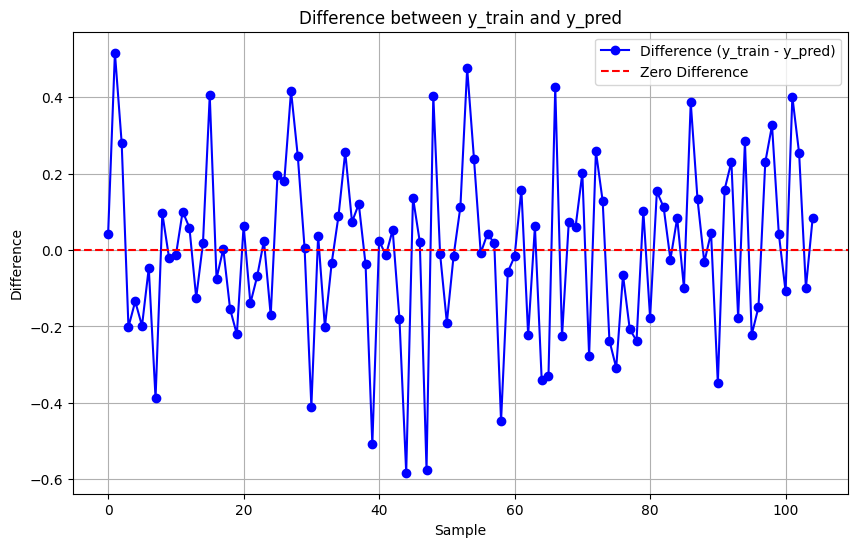

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(difference, marker='o', linestyle='-', color='b', label='Difference (y_train - y_pred)')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Difference')
plt.title('Difference between y_train and y_pred')
plt.xlabel('Sample')
plt.ylabel('Difference')
plt.legend()
plt.grid(True)
plt.show()


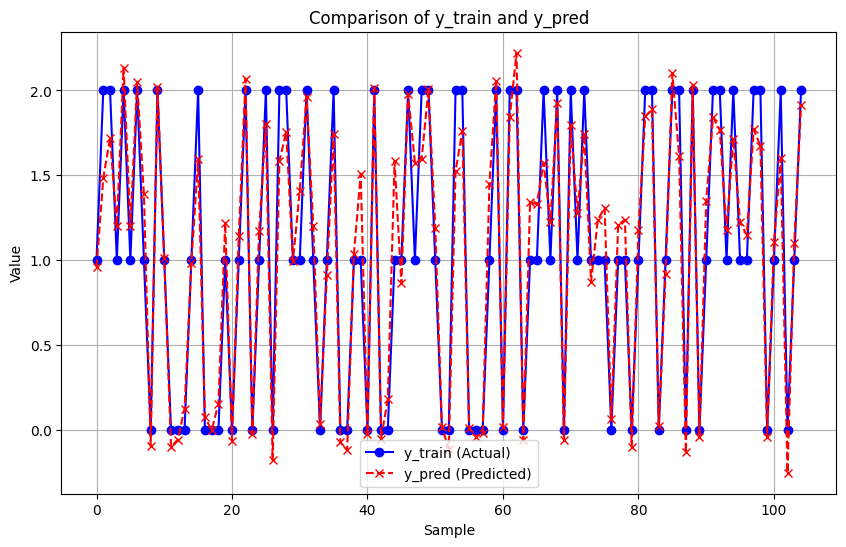

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(y_train, marker='o', linestyle='-', color='b', label='y_train (Actual)')
plt.plot(y_pred, marker='x', linestyle='--', color='r', label='y_pred (Predicted)')
plt.title('Comparison of y_train and y_pred')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
test_pred = linear.predict(X_test)

In [21]:
linear.score(X_test, y_test)

0.9442318571467434

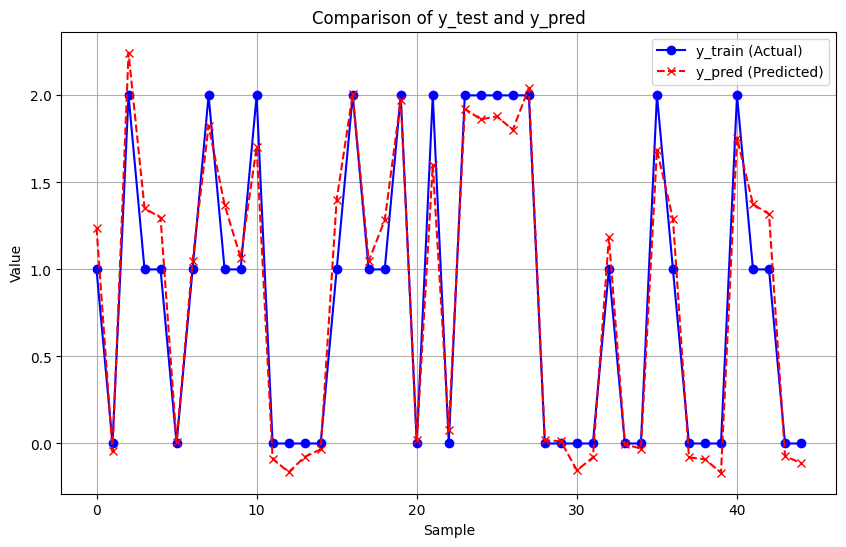

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, marker='o', linestyle='-', color='b', label='y_train (Actual)')
plt.plot(test_pred, marker='x', linestyle='--', color='r', label='y_pred (Predicted)')
plt.title('Comparison of y_test and y_pred')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Concept of Polynomial Regressison  

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:

for deg in range(1, 5):
    poly = PolynomialFeatures(degree=deg)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    train_accuracy = model.score(X_poly_train, y_train)
    test_accuracy = model.score(X_poly_test, y_test)
    
    print(f"Degree: {deg} || Train Accuracy: {train_accuracy} || Test Accuracy: {test_accuracy}")


Degree: 1 || Train Accuracy: 0.9217045042860801 || Test Accuracy: 0.9442318571467434
Degree: 2 || Train Accuracy: 0.9450433852043173 || Test Accuracy: 0.9523725931788779
Degree: 3 || Train Accuracy: 0.8468450612523845 || Test Accuracy: 0.6307264839131862
Degree: 4 || Train Accuracy: 0.9655121063315117 || Test Accuracy: -0.8382151512593903


In [34]:
# using degree 2

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
    
model = LinearRegression()
model.fit(X_poly_train, y_train)
    
train_accuracy = model.score(X_poly_train, y_train)
test_accuracy = model.score(X_poly_test, y_test)

y_pred_poly = model.predict(X_poly_test)

print(f"Train Accuracy: {train_accuracy} || Test Accuracy: {test_accuracy}")

Train Accuracy: 0.9450433852043173 || Test Accuracy: 0.9523725931788779


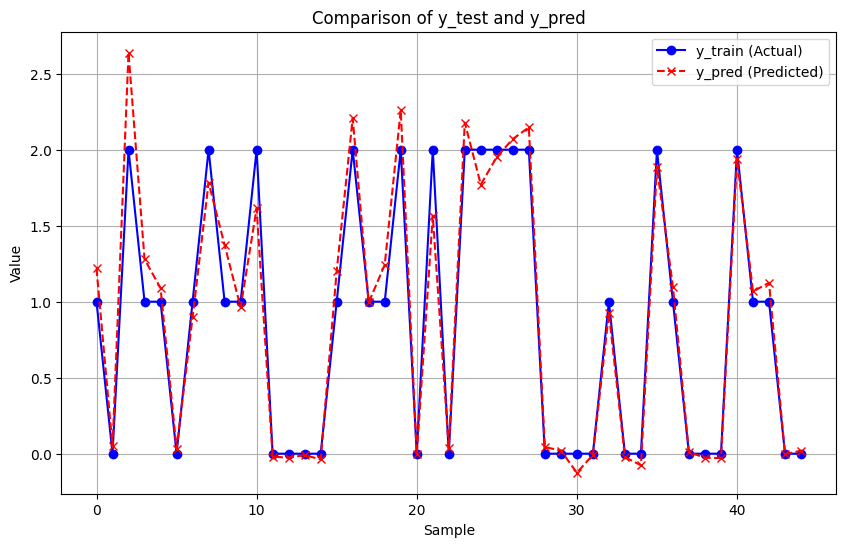

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, marker='o', linestyle='-', color='b', label='y_train (Actual)')
plt.plot(y_pred_poly, marker='x', linestyle='--', color='r', label='y_pred (Predicted)')
plt.title('Comparison of y_test and y_pred')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# trying feature selection using lasso 

In [44]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [39]:
model = Lasso(alpha = 1.0)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 0.536 (0.096)


In [60]:

lasso_model = Lasso()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = dict()
grid['alpha'] = np.arange(1, 0, -0.1)


                       
search = GridSearchCV(lasso_model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
                       
results = search.fit(X_train, y_train)
                       
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.217
Config: {'alpha': 0.1000000000000002}


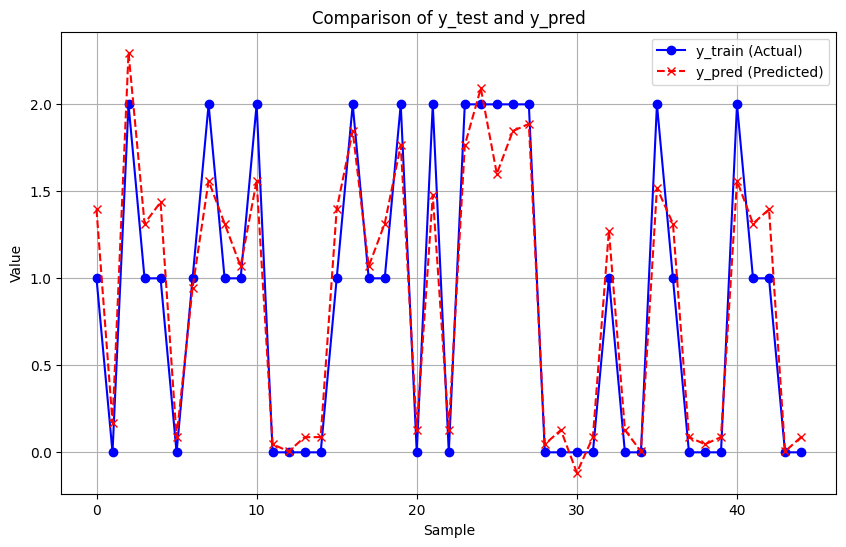

Score : 0.9063068004974982


In [73]:
lasso_model = Lasso(alpha = 0.1000000000000002)
lasso_model.fit(X_train,y_train)
lasso_pred = lasso_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test, marker='o', linestyle='-', color='b', label='y_train (Actual)')
plt.plot(lasso_pred, marker='x', linestyle='--', color='r', label='y_pred (Predicted)')
plt.title('Comparison of y_test and y_pred')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

print("Score :",lasso_model.score(X_test , y_test))

### The scikit-learn library also provides a built-in version of the algorithm that automatically finds good hyperparameters via the LassoCV class.

In [62]:
from sklearn.linear_model import LassoCV

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

lasso_cv_model = LassoCV(alphas=np.arange(1, 0, -0.01), cv=cv, n_jobs=-1)

lasso_cv_model.fit(X_train, y_train)

print('alpha: %f' % lasso_cv_model.alpha_)

alpha: 0.010000


In [66]:
print(lasso_cv_model.score(X_test,y_test))
pred_lasso_cv = lasso_cv_model.predict(X_test)

0.9396612711272587


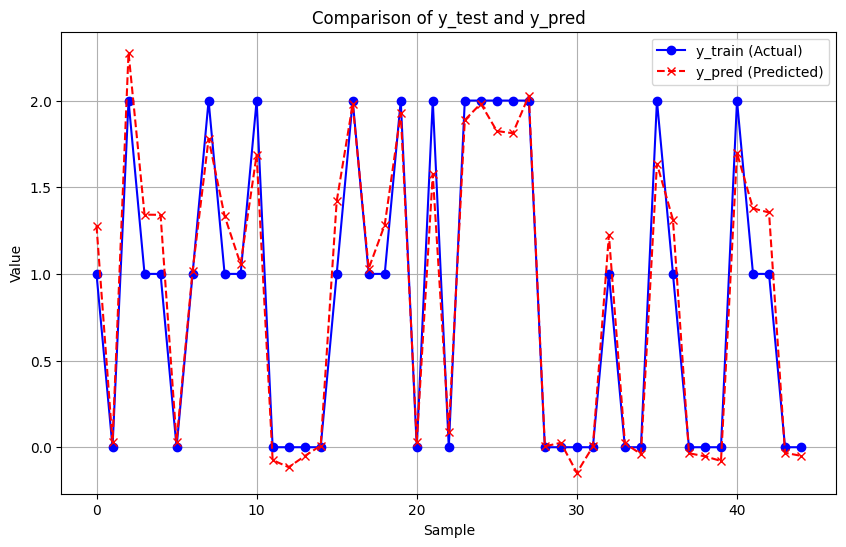

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, marker='o', linestyle='-', color='b', label='y_train (Actual)')
plt.plot(pred_lasso_cv, marker='x', linestyle='--', color='r', label='y_pred (Predicted)')
plt.title('Comparison of y_test and y_pred')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()